<a href="https://colab.research.google.com/github/smarvar/Machine-Learnig-practice/blob/master/TP3/TP3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Conformamos el Dataset para dos atributos y dos target
N_data = 100                  
np.random.seed(1)
df_1 = pd.DataFrame(np.random.normal(scale=10, size=(N_data, 2)), columns=['X', 'Y'])
df_1['Target'] = 0

np.random.seed(300)
features_number = 2
df_2 = pd.DataFrame(np.random.normal(loc = [15,10], scale=10, size=(N_data, 2)),  columns=['X', 'Y'])
df_2['Target'] = 1
df = pd.concat([df_1, df_2], ignore_index=True)

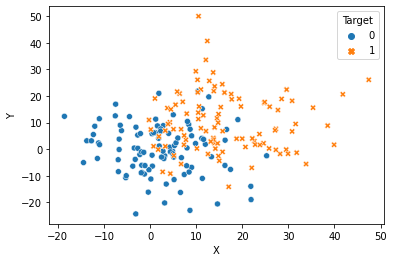

In [ ]:
sns.scatterplot(data=df, x="X", y="Y", hue="Target", style="Target")

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

X = df.iloc[:,0:2]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# Definimos los parametros a testear por parte de Gridsearch, con el fin de encontrar los mas optimos
knn = neighbors.KNeighborsClassifier()
parameters = {'n_neighbors':[1,3,5,10,15,20,30,40], 'p':[1, 2]} # Parametros a encontrar
clf = GridSearchCV(knn, parameters, cv=10) # Se define un Cross_validation = 10
clf_Grid = clf.fit(X_train, y_train)

In [ ]:
# Mejores parametros encontrados
print('Best n_neighbors:',clf_Grid.best_estimator_.get_params()['n_neighbors'])
print('Best p:', clf_Grid.best_estimator_.get_params()['p'])

Best n_neighbors: 30
Best p: 2


In [ ]:
# Observamos los parametros de Calidad del modelo con base en los mejores parametros encontrados por Gridseacrch
from sklearn import metrics
y_pred = clf_Grid.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 20, 30, 40],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        51
           1       0.81      0.88      0.84        49

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.

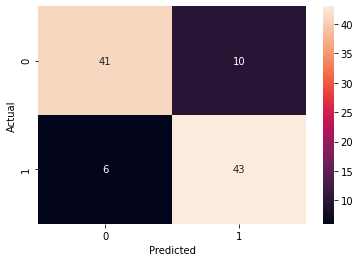

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Text(0, 0.5, 'Y')

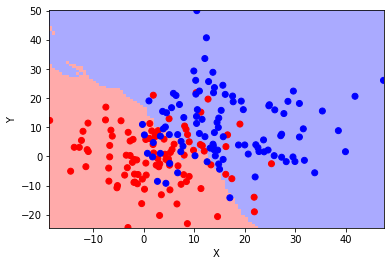

In [ ]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

X = np.array(df[['X','Y']])
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
clf_zone = clf_Grid.predict(np.c_[xx.ravel(), yy.ravel()])
clf_zone = clf_zone.reshape(yy.shape)

plt.figure()
plt.pcolormesh(xx, yy, clf_zone, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('X')
plt.ylabel('Y')

Se puede observar como el modelo hace una buena separación de los datos sin una tendencia alta se sobreajuste

**Entranamos el modelo sin Gridsearch, definiendo un k = 10 sin CV**

In [ ]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn2, metrics.classification_report(y_test, y_pred2)))


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        51
           1       0.75      0.84      0.79        49

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100




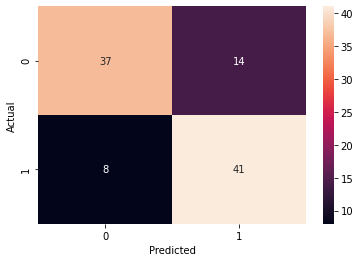

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Text(0, 0.5, 'Y')

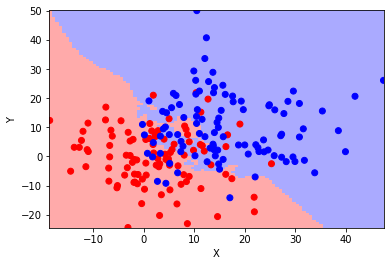

In [ ]:
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
clf_zone = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
clf_zone = clf_zone.reshape(yy.shape)

plt.figure()
plt.pcolormesh(xx, yy, clf_zone, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('X')
plt.ylabel('Y')

Aqui puede observarse como el modelo tiende a sobreajustarse y pierde generalización, con lo cual el modelo encontrado mediante Gridsearch es mas conveniente.